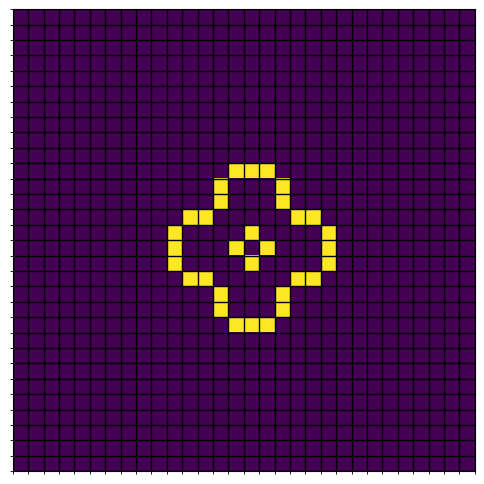

In [349]:
import matplotlib.pyplot as plt
import numpy as np

class GameOfLife(object):  
    """
    A class that implements the Game of Life simulation, a cellular automaton devised by John Conway.
    It provides methods to initialize the grid, populate it with live cells, advance the simulation 
    by a given number of steps, and draw the current grid state.

    Attributes:
    x_dim (int): The number of columns in the grid.
    y_dim (int): The number of rows in the grid.
    life_grid (list): A 2D list representing the state of the grid.
    """
    
    def __init__(self, x_dim, y_dim):
        """
        Initializes the grid with given dimensions and sets all cells to dead (0).
        
        Parameters:
        x_dim (int): The number of columns in the grid.
        y_dim (int): The number of rows in the grid.
        """
        self.x_dim=x_dim
        self.y_dim=y_dim
        self.life_grid=[[0 for _ in range(x_dim)] for _ in range(y_dim)]


    def get_grid(self):
        """
        Returns the current state of the grid.
        
        Returns:
        list: The 2D list representing the grid's state.
        """
        return self.life_grid 

    
    def print_grid(self):
        """
        Prints the current state of the grid in a human-readable format.
        Each row is printed on a new line, and each cell is separated by a pipe character '|'.
        """
        for row in range(self.y_dim):
            print(self.x_dim*'--')
            for col in range(self.x_dim):
                print(self.life_grid[row][col], end='|')
            print()

    
    def populate_grid(self, coord):
        '''
        Populates the game grid with live cells at the specified coordinates.
    
        Parameters:
        coord: A list of tuples. Each tuple represents the (x, y) coordinates of a live cell.

        Returns:
        The updated life_grid with the new live cells.
        '''
        self.coord=coord
        # set the corresponding elements in your grid to 1.
        for r, c in self.coord:
            self.life_grid[r][c] = 1
        return self.life_grid


    def make_step(self):
        """
        Advances the game by one step based on the rules of Conway's Game of Life.
        
        - A live cell with fewer than two live neighbors dies (underpopulation).
        - A live cell with two or three live neighbors remains alive.
        - A live cell with more than three live neighbors dies (overpopulation).
        - A dead cell with exactly three live neighbors becomes alive (reproduction).
        
        Returns:
        list: The updated grid after applying the rules for one step.
        """
        # Step 1: Initialize a grid to hold the sum of neighbors
        sum_grid = [[0 for _ in range(self.x_dim)] for _ in range(self.y_dim)]

        # Step 2: Calculate the number of live neighbors for each cell
        for i in range(self.y_dim):
            for j in range(self.x_dim):
                for a in [-1, 0, 1]:
                    for b in [-1, 0, 1]:
                        if a == 0 and b == 0:
                            continue  # Skip the cell itself
                        ni, nj = i + a, j + b
                        if 0 <= ni < self.y_dim and 0 <= nj < self.x_dim:
                            sum_grid[i][j] += self.life_grid[ni][nj]
                        
        # Step 3: Apply the Game of Life rules to update life_grid
        for i in range(self.y_dim):
            for j in range(self.x_dim):
                live_neighbors = sum_grid[i][j]
                if self.life_grid[i][j] == 1:
                    if live_neighbors < 2 or live_neighbors > 3:
                        self.life_grid[i][j] = 0  # Cell dies
                     # else remains alive (2 or 3 neighbors)
                else:
                    if live_neighbors == 3:
                        self.life_grid[i][j] = 1  # Cell becomes alive

        return self.life_grid

                    

    def make_n_steps(self, n):
        """
        Advances the game by a given number of steps.
        
        Parameters:
        n (int): The number of steps to simulate.

        Returns:
        list: The grid after applying the specified number of steps.
        """
        # Implement a method that applies the make_step method n times.
        for i in range(n):
            self.make_step()
      
        return self.life_grid



    def draw_grid(self):
        """
        Draws the current state of the grid using matplotlib, where live cells are represented by 
        a green color and dead cells by a black color.
        """
        # Draw the current state of the grid.
        x_coor=[]
        y_coor=[]
        
        for col in range(self.x_dim):
            for row in range(self.y_dim):
                x_coor.append(col)
                y_coor.append(row)

               
        fig, ax = plt.subplots(figsize=(12, 6))

        # Convert grid data to a numpy array for better handling
        grid_array = np.array(self.life_grid)

        # Plot the grid, with '1's as green and '0's as black
        ax.imshow(grid_array, cmap='viridis', interpolation='nearest')

        # Set grid lines
        ax.set_xticks(np.arange(-0.5, grid_array.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_array.shape[0], 1), minor=True)
        ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

        # Turn off the axis labels
        ax.set_xticks([])
        ax.set_yticks([])

        # Show the plot
        plt.show()

        

 # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
coor = [(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]
#coor=[(10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14)]
# coor=[(14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),
# (16, 14), (16, 15), (16, 17), (16, 18),
# (18, 14), (18, 15), (18, 17), (18, 18),
# (14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)]
  
# Initialize the Game of Life with a 60x60 grid
game = GameOfLife(30, 30)
# Populate the grid with the provided coordinates of live cells
game.populate_grid(coor)
# Make 55 steps in the simulation
game.make_n_steps(10)
# Draw the current state of the grid
game.draw_grid()



In [351]:
help(GameOfLife)
help(GameOfLife.__init__)
help(GameOfLife.populate_grid)
help(GameOfLife.make_step)
help(GameOfLife.make_n_steps)
help(GameOfLife.get_grid)
help(GameOfLife.print_grid)
help(GameOfLife.draw_grid)

Help on class GameOfLife in module __main__:

class GameOfLife(builtins.object)
 |  GameOfLife(x_dim, y_dim)
 |
 |  A class that implements the Game of Life simulation, a cellular automaton devised by John Conway.
 |  It provides methods to initialize the grid, populate it with live cells, advance the simulation
 |  by a given number of steps, and draw the current grid state.
 |
 |  Attributes:
 |  x_dim (int): The number of columns in the grid.
 |  y_dim (int): The number of rows in the grid.
 |  life_grid (list): A 2D list representing the state of the grid.
 |
 |  Methods defined here:
 |
 |  __init__(self, x_dim, y_dim)
 |      Initializes the grid with given dimensions and sets all cells to dead (0).
 |
 |      Parameters:
 |      x_dim (int): The number of columns in the grid.
 |      y_dim (int): The number of rows in the grid.
 |
 |  draw_grid(self)
 |      Draws the current state of the grid using matplotlib, where live cells are represented by
 |      a green color and dead c